In [3]:
population_dict = {'china':1439, 'india':1380, 'usa':331, 'france':65,'germany':83, 'spain':46}

In [5]:
country_name = input('Please enter country name: ').lower()
print(population_dict[country_name])

Please enter country name: INDIA
1380


## Dealing with Typos

But, now let’s say the user enters ‘Frrance’ instead of ‘France’. How can we deal with this?

In [7]:
while(True):
    country_name = input('Please enter country name(type exit to close): ').lower()
    
    if country_name =='exit':
        break
    
    if country_name in population_dict.keys():
        print(population_dict[country_name])
        
    else:
        print("please check for any typos. Data not available for ", country_name)

Please enter country name(type exit to close): cap
please check for any typos. Data not available for  cap
Please enter country name(type exit to close): sun
please check for any typos. Data not available for  sun
Please enter country name(type exit to close): india
1380
Please enter country name(type exit to close): exit


## top 5 pandas

In [8]:
import pandas as pd
import seaborn as sns

mpg = sns.load_dataset('mpg')

In [12]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [14]:
pd.crosstab(index =mpg['origin'], columns =mpg['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [17]:
pd.crosstab(index =mpg['origin'], columns =mpg['model_year'], values =mpg['cylinders'], aggfunc ='mean')

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,4.000000,4.0,4.000000,4.000000,4.000000,4.0,4.250000,4.000000,4.833333,4.25000,4.111111,4.500000,4.0
japan,4.000000,4.0,3.800000,4.250000,4.000000,4.0,4.500000,4.166667,4.000000,4.00000,4.076923,4.333333,4.0
usa,7.636364,6.2,6.888889,7.241379,6.266667,6.4,6.363636,6.222222,6.000000,6.26087,4.285714,4.923077,4.3


### cut

Pandas cut function is used to binning the continuous values into discrete intervals. We use cut when we need to segment and sort continuous values into bins. For you who did not know what binning is; it is a process of putting the continuous value into a certain range interval. It is best described by using the histogram plot.

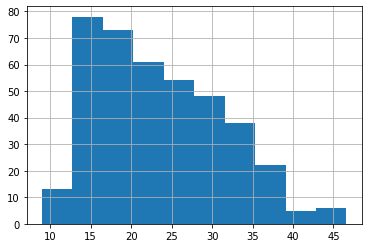

In [18]:
mpg['mpg'].hist()

In [19]:
pd.cut(x =mpg['mpg'], bins =4, labels=[1,2,3,4])

0      1
1      1
2      1
3      1
4      1
      ..
393    2
394    4
395    3
396    3
397    3
Name: mpg, Length: 398, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [20]:
origin_dummies = pd.get_dummies(mpg['origin'])
origin_dummies

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [21]:
pd.concat(objs =[mpg['mpg'], origin_dummies], axis =1)

,mpg,europe,japan,usa
0,18.0,0,0,1
1,15.0,0,0,1
2,18.0,0,0,1
3,16.0,0,0,1
4,17.0,0,0,1
...,...,...,...,...
393,27.0,0,0,1
394,44.0,1,0,0
395,32.0,0,0,1
396,28.0,0,0,1


# Plotly

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(data ={'Number':range(1,1000000)})

In [6]:
%%time

total =0
for _, row in df.iterrows():
    total +=row['Number']
total

CPU times: user 1min 49s, sys: 42.9 ms, total: 1min 49s
Wall time: 1min 49s


499999500000

In [7]:
%%time

total =0
for row in df.itertuples(index = False):
    total +=row.Number
total

CPU times: user 872 ms, sys: 3.98 ms, total: 876 ms
Wall time: 876 ms


499999500000